In [194]:
import pandas as pd
import numpy as np

In [195]:
data=pd.read_csv('gold.csv')

# Cleaning of the dataset

In [196]:
data.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
0,"Mar 29, 2023","1,966.10","1,966.10","1,966.10","1,966.10","1,966.10",21
1,"Mar 28, 2023","1,972.40","1,972.40","1,972.40","1,972.40","1,972.40",21
2,"Mar 27, 2023","1,957.20","1,957.20","1,952.40","1,952.40","1,952.40",877


In [197]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [198]:
list=['Open','High','Low','Close','Adj Close']

Their are some days with where the values from Open to Valume are not present just remove the values

In [199]:
data=data[data['Open']!='-']

In [200]:
for i in list:
    data[i]=data[i].str.replace(',','').astype(float)


In [201]:
data['Date'] = pd.to_datetime(data['Date'])


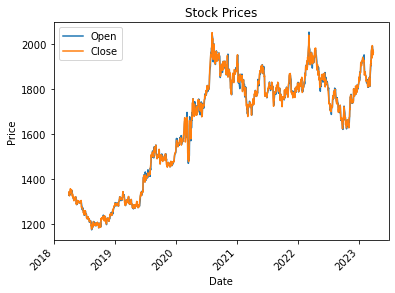

In [202]:
import matplotlib.pyplot as plt

# convert Date column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# plot Open and Close columns against Date column
plt.plot(data['Date'], data['Open'], label='Open')
plt.plot(data['Date'], data['Close'], label='Close')

# set x-axis label and tick format
plt.xlabel('Date')
plt.xticks(rotation=45, ha='right')

# set y-axis label
plt.ylabel('Price')

# set plot title and legend
plt.title('Stock Prices')
plt.legend()

# show the plot
plt.show()

In [203]:
data=data.drop(columns=['High','Low','Adj Close','Volume','Close'],axis=1)


In [204]:
data=data.reset_index()
x=data['index'].values.reshape(-1,1)
y=data['Open'].values.reshape(-1,1)

In [205]:
data

,index,Date,Open
0,0,2023-03-29,1966.1
1,1,2023-03-28,1972.4
2,2,2023-03-27,1957.2
3,3,2023-03-24,1991.7
4,4,2023-03-23,1990.5
...,...,...,...
1255,1261,2018-04-06,1326.5
1256,1262,2018-04-05,1333.5
1257,1263,2018-04-04,1331.8
1258,1264,2018-04-03,1340.4


In [206]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [207]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [208]:
model=LinearRegression()

In [209]:
model.fit(x_train,y_train)

LinearRegression()

In [210]:
y_pred=model.predict(x_test)

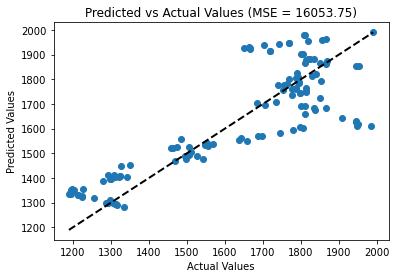

In [219]:
i
from sklearn.metrics import mean_squared_error


mse = mean_squared_error(y_test, y_pred)

# plot the predicted vs actual values
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values (MSE = {:.2f})'.format(mse))
plt.show()